This project aims to discover how “Greenthumb community gardens” areas in a neighbourhood affect housing prices and rental rates in New York City. Two datasets has been used for analysis <br>

<b>(1) DOF: Condominium comparable rental income – Manhattan - FY 2010/2011: </b> <br>
The Department of Finance (DOF) is required by NY State law to value condominiums or cooperatives as if they were residential rental apartment buildings. DOF uses income information from rental properties similar in physical features and location to the condominiums or cooperatives. DOF applies this income data to the condominium or cooperative and determine its value in the same way DOF values rental apartment buildings.<br>

link: https://data.cityofnewyork.us/Housing-Development/DOF-Condominium-comparable-rental-income-Manhattan/ikqj-pyhc"

<b>(2) NYC Greenthumb Community Gardens: </b>
<br>
Listing of NYC Greenthumb community gardens. <br>
link: https://data.cityofnewyork.us/Environment/NYC-Greenthumb-Community-Gardens/ajxm-kzmj

## Import necessary modules/library

In [1]:
import pandas as pd
import numpy as np

## mapping 
import folium
import branca ## for color map

# Matplotlib and plotly modules
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)


### Latex Parameters

In [2]:
# latex parameter
font = {
    'family': 'serif', 
    'serif': ['Computer Modern Roman'],
    'weight' : 'regular',
    'size'   : 14
    }

plt.rc('font', **font)

### Read data

In [3]:
con_df = pd.read_csv('./Condominium_comparable_rental_income.csv')
grn_df = pd.read_csv('./Greenthumb_Community_Gardens.csv')

In [4]:
con_df = con_df.dropna()

### Rename long columns

In [5]:
columns = ['boro_block_lot', 'condo_section','address','borough','postcode','latitude',
 'longitude','community_board','council_district','census_tract','BIN','BBL', 'NTA',
 'neighborhood','building_classification','total_units','year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft','rent_1_boro_block_lot','rent_1_address','rent_1_neighborhood',
 'rent_1_building_classification','rent_1_total_units','rent_1_year_built','rent_1_gross_sqft','rent_1_gross_income',
 'rent_1_gross_income_psqft','rent_1_market_value','rent_1_market_value_psqft','rent_1_dist_from_coop_miles',
 'rent_2_boro_block_lot','rent_2_address','rent_2_neighborhood','rent_2_building_classification','rent_2_total_units',
 'rent_2_year_built','rent_2_gross_sqft','rent_2_gross_income','rent_2_gross_income_psqft','rent_2_market_value',
 'rent_2_market_alue_psqft','rent_2_dist_from_coop_miles']

In [6]:
con_df.columns = columns

In [7]:
con_df.head()

boro_block_lot condo_section              address  borough  postcode  \
0   1-00007-7501        735-R1      1 COENTIES SLIP        1   10004.0   
1   1-00008-7501       1822-R1  39 WHITEHALL STREET        1   10004.0   
2   1-00015-7502       1557-R1       20 WEST STREET        1   10004.0   
3   1-00016-7501        308-R1     377 RECTOR PLACE        1   10280.0   
4   1-00016-7502        313-R1    320 ALBANY STREET        1   10280.0   

    latitude  longitude  community_board  council_district  census_tract  \
0  40.703627 -74.010607              1.0               1.0           9.0   
1  40.703037 -74.012969              1.0               1.0           9.0   
2  40.706358 -74.016151              1.0               1.0          13.0   
3  40.709506 -74.018002              1.0               1.0       31704.0   
4  40.710165 -74.016751              1.0               1.0       31704.0   

              ...               rent_2_neighborhood  \
0             ...                         FINANCIAL   
1             ...                      CIVIC CENTER   
2             ...                         FINANCIAL   
3             ...                           TRIBECA   
4             ...                           TRIBECA   

   rent_2_building_classification rent_2_total_units rent_2_year_built  \
0                     D8-ELEVATOR               61.0            1929.0   
1                     D6-ELEVATOR              151.0            1999.0   
2                     D5-ELEVATOR              482.0            1929.0   
3                     D8-ELEVATOR              218.0            1998.0   
4                     D8-ELEVATOR              218.0            1998.0   

  rent_2_gross_sqft  rent_2_gross_income  rent_2_gross_income_psqft  \
0           57941.0            2260000.0                       39.0   
1          139697.0            7168000.0                       51.0   
2          390531.0           17218000.0                       44.1   
3          239185.0           15723000.0                       66.0   
4          239185.0           15723000.0                       66.0   

   rent_2_market_value  rent_2_market_alue_psqft  rent_2_dist_from_coop_miles  
0           11100000.0                     192.0                         0.40  
1           35200000.0                     252.0                         1.05  
2           84500000.0                     216.0                         0.40  
3           77200000.0                     323.0                         0.00  
4           77200000.0                     323.0                         0.00  

[5 rows x 46 columns]

### Pair plot to find relationships among the features

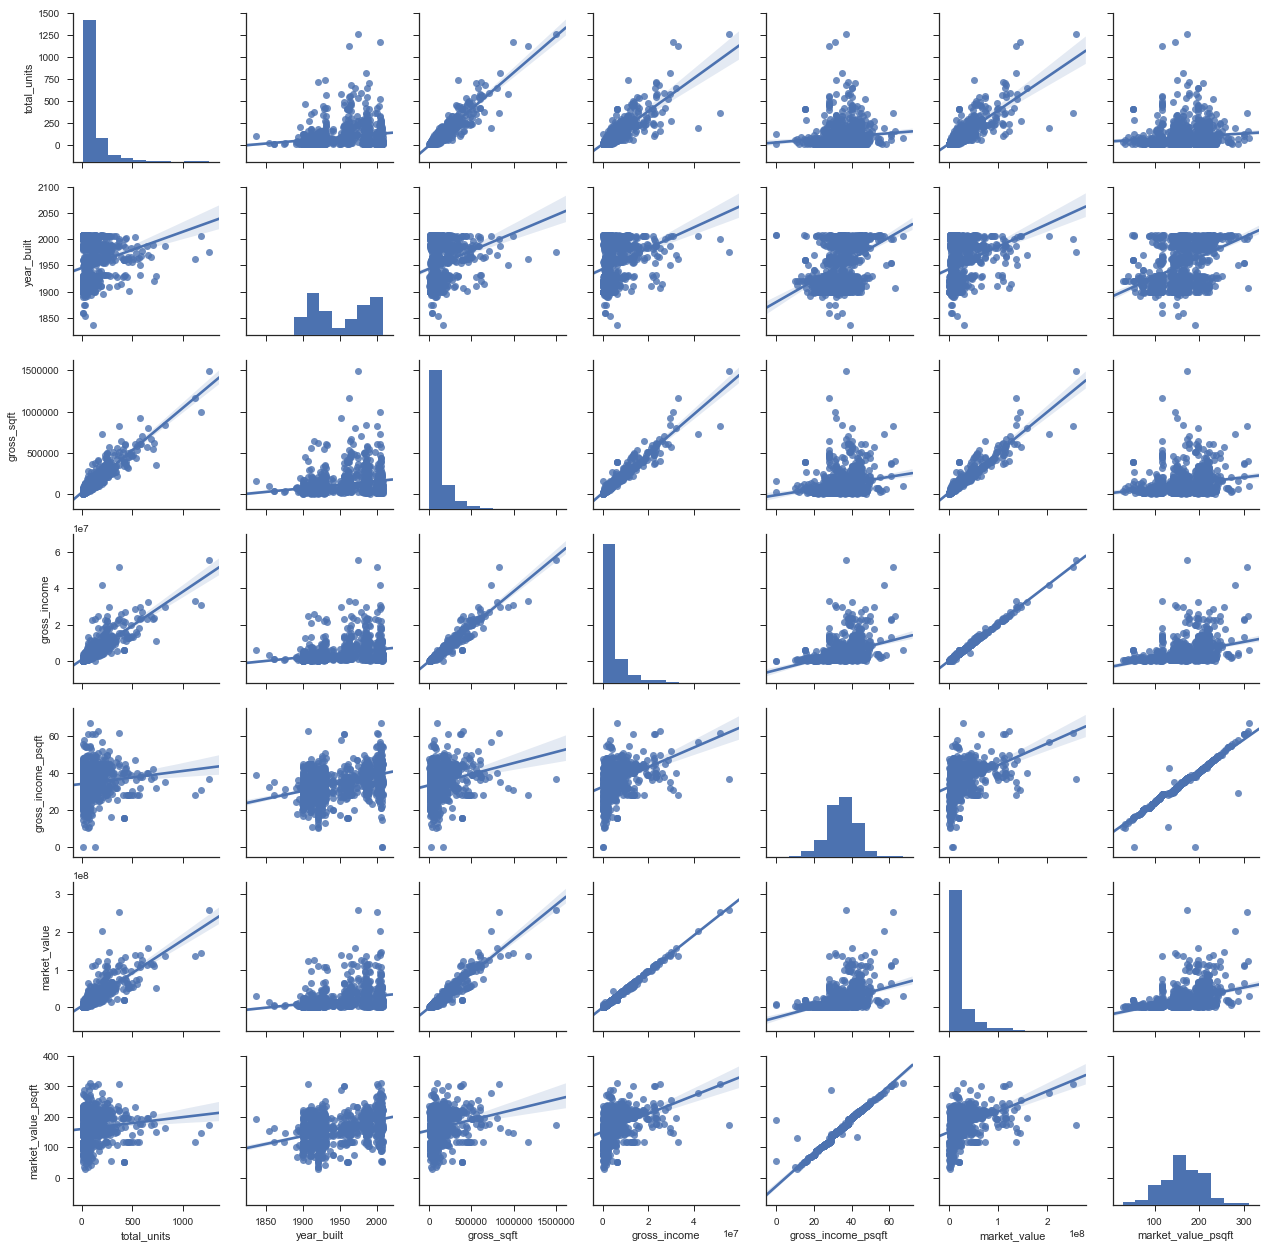

In [8]:
ana_cols = ['building_classification','total_units','year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft']
aa = con_df[ana_cols]

sns.set(style="ticks")
sns.pairplot(aa, kind="reg")
plt.show()

Figure 1: scatter plots among the features. Some of the features are correlated very well. For example, gross income vs market value, gross income from per square feet vs market value per square fit have excellent and positive linear relationship. While gross sqft and market value, total units and market value, gross sqft and gross income, gross sqft and total units have semi perfect positive linear relationship. Some the feature paris (year built and market value per sqft, year built gross income etc.) do not any compareable relationship. The following sections describe the details of these observation both in terms of statistical and geospatial context.

## Mapping 

In [9]:
grn_df['Latitude'] = grn_df['Latitude'].astype(float)
grn_df['Longitude'] = grn_df['Longitude'].astype(float)
grn_df = grn_df.dropna(axis=0, subset=['Latitude','Longitude'])

In [10]:
con_df['latitude'] = con_df['latitude'].astype(float)
con_df['longitude'] = con_df['longitude'].astype(float)
con_df = con_df.dropna(axis=0, subset=['latitude','longitude'])

In [11]:
map_1 = folium.Map(location=[40.773752, -73.972679], zoom_start = 12) ## ["Stamen Terrain", "Stamen Toner", "Mapbox Bright"]

housings_points = int(con_df['longitude'].describe()['count'])
gardens_points = int(grn_df['Longitude'].describe()['count'])


for i in range(housings_points):
    # Other areas   
    latitude = con_df.iloc[i]['latitude']
    longitude = con_df.iloc[i]['longitude']
    
    folium.CircleMarker([latitude, longitude],
                        radius=2,
                        color='#FF0000',
                        fill_color='#FF0000', ).add_to(map_1)


## green areas  
for i in range(gardens_points):
    latitude = grn_df.iloc[i]['Latitude']
    longitude = grn_df.iloc[i]['Longitude']
    
    folium.CircleMarker([latitude, longitude],
                        radius=2,
                        color='#008000',
                        fill_color='#008000', ).add_to(map_1)
    
map_1

<b> Map 1 </b> : Map show the locations of comdominiums (red dots) in Mahattan and greenthumb community gardens (green dots). Most of the gardens are located out the Manhattan, although there are some of the gardens are located upper and and lower manhattan. Few are located in midtown by the times square. The reason for fewer gardens in mahattna may be the limited space or commercial usages.

### Groupby postcode

It would be nice if we see how the gross income from condominiums vary in different postcodes. In order to do that I have group the datasets by zip code and average the evry numeric data over the zip code.

In [12]:
postcodes = con_df.groupby('postcode', as_index = False).agg(np.mean)
postcodes["postcode"] = postcodes["postcode"].apply(lambda x: str(int(x)))
postcodes["postcode"] = postcodes["postcode"].astype(int)

### Color maps

In [13]:
class plot_color_map(object):
    
    def __init__(self, feature):
        self.feature = str(feature)
        self.minc = postcodes[feature].describe()['min']
        self.maxc = postcodes[feature].describe()['max']
        self.colorscale = branca.colormap.linear.YlGnBu.scale(self.minc, self.maxc)
        
    def fill_color(self, geo_feature):
        postal_code = geo_feature['properties']['postalCode']
        aa = postcodes[postcodes['postcode'] == int(postal_code)][self.feature]

        if len(aa) == 0:
            return '#ffffff' ## white
        else:
            return self.colorscale(int(aa))
    
    def create_map(self):
        postcode_map = folium.Map(location=[40.773752, -73.972679],
                                  tiles = "cartodbpositron", zoom_start = 13)

        self.colorscale.caption = self.feature

        folium.GeoJson(
            'nyczipcode.geojson',
            style_function = lambda feature: {
                'fillColor': self.fill_color(feature),
                'color' : 'black',
                'weight' : 0.5,
                'dashArray' : '5, 5'
                }
            ).add_to(postcode_map)

        ## green areas  
        for i in range(gardens_points):
            latitude = grn_df.iloc[i]['Latitude']
            longitude = grn_df.iloc[i]['Longitude']

            folium.CircleMarker([latitude, longitude],
                                radius = 1,
                                color='#008000',
                                fill_color='#008000', ).add_to(postcode_map)

        postcode_map.add_child(self.colorscale)

        return postcode_map


In [14]:
plot_color_map('gross_income').create_map()

In [15]:
plot_color_map('market_value').create_map()

## Neighborhood Tabulation Area (NTA)

### Find expensive NTA

In [16]:
nta = con_df.groupby('NTA', as_index = False).agg(np.mean)

In [17]:
nta_list = []
for i in range(len(nta['NTA'])):
    nta_list.append(str(nta['NTA'][i]).rstrip())

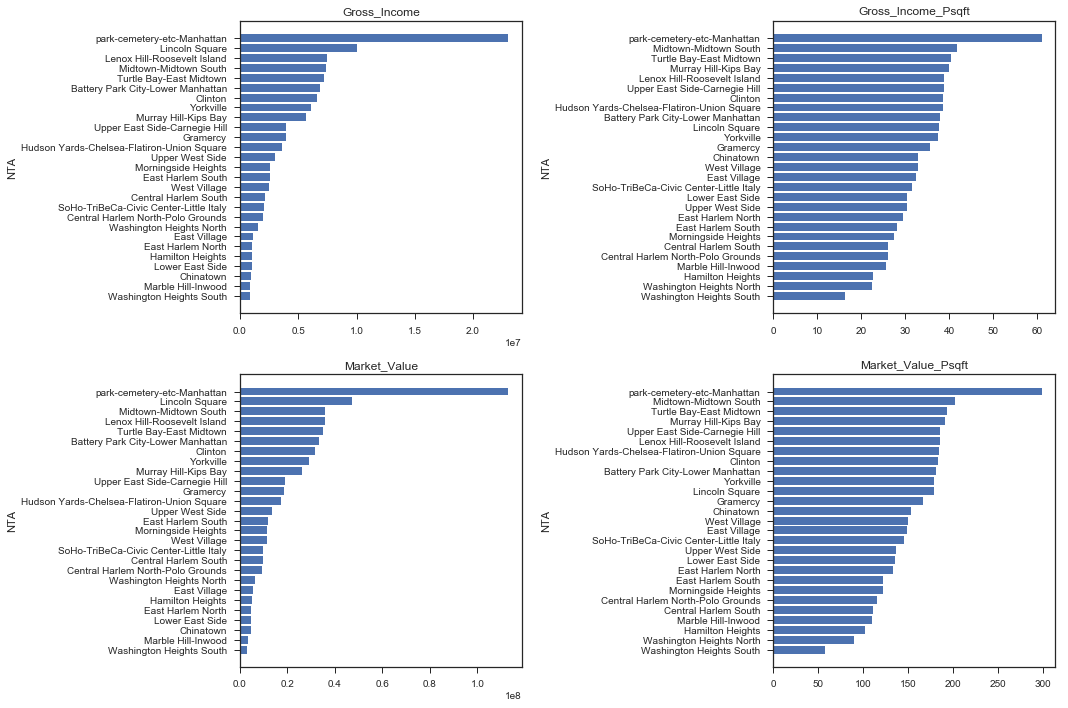

In [18]:
features = ['gross_income', 'gross_income_psqft', 'market_value', 'market_value_psqft']

y_pos = np.arange(len(nta_list))

fig = plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    
    market_value = list(nta[feature])

    values = sorted(zip(nta_list, market_value), key=lambda x: x[1] * 1)
    sorted_nta_list, sorted_market_value = zip(*values)
    
    plt.subplot(2,2,i+1)
    plt.barh(y_pos, sorted_market_value)
    plt.yticks(y_pos, sorted_nta_list, fontsize= 10)
    plt.ylabel('NTA')
    plt.title(str(feature.replace('MANHATTAN CONDOMINIUM PROPERTY', '')).title())

plt.tight_layout()
plt.show()

###  NTA map based on Gross Income

In [19]:
feature = 'gross_income'
minc = nta[feature].describe()['min']
maxc = nta[feature].describe()['max']
colorscale = branca.colormap.linear.YlGnBu.scale(minc, maxc)
        
def color_function(i):
    aa = nta.iloc[i][feature]
    cc = colorscale(float(aa))
    return cc
    

postcode_map = folium.Map(location=[40.773752, -73.972679],
                          tiles = "cartodbpositron", zoom_start = 13)

# folium.GeoJson('NTA_map.geojson').add_to(postcode_map)
    
## green areas  
for i in range(len(nta)):
    latitude = nta.iloc[i]['latitude']
    longitude = nta.iloc[i]['longitude']
    color = color_function(i)
    folium.CircleMarker([latitude, longitude],
                        radius = 10,
                        fill=True,
                        fill_color= color_function(i),
                        color = color_function(i),
                        fill_opacity= 1.0).add_to(postcode_map)

## green areas  
for i in range(gardens_points):
    latitude = grn_df.iloc[i]['Latitude']
    longitude = grn_df.iloc[i]['Longitude']

    folium.CircleMarker([latitude, longitude],
                        radius = 1,
                        color='#008000',
                        fill_color= '#008000', ).add_to(postcode_map)

postcode_map.add_child(colorscale)
postcode_map

From the above map it is pretty obvious that NTA that have gradens in it, have comparativelyn lower gross income. While the NTAs in the middle of the Manhattan have relatively higher gross income. The reson for the high gross income of NTAs are may be the locations. For example all the NTA's located in the center of the city, specoially by the times square are expensive. The followings are the statistical analysis of the NTAs with high gross income.

## Statistical data analysis

In [84]:
cond_nta_list = []
for i in range(len(nta['NTA'])):
    cond_nta_list.append(str(nta['NTA'][i]).rstrip())

grdn_nta_list = []
for i, grnd_nta in enumerate(np.unique(grn_df['NTA'])):
    grdn_nta_list.append(str(grnd_nta).rstrip())

In [85]:
common_nta = list(set(cond_nta_list) & set(grdn_nta_list))

In [86]:
def check_garden(x):
    nnttaa = x['NTA']
    if str(nnttaa).rstrip() in common_nta:
        return 1
    else:
        return 0

In [87]:
nta['has_garden'] = 0
nta['has_garden'] = nta.apply(check_garden, axis=1)

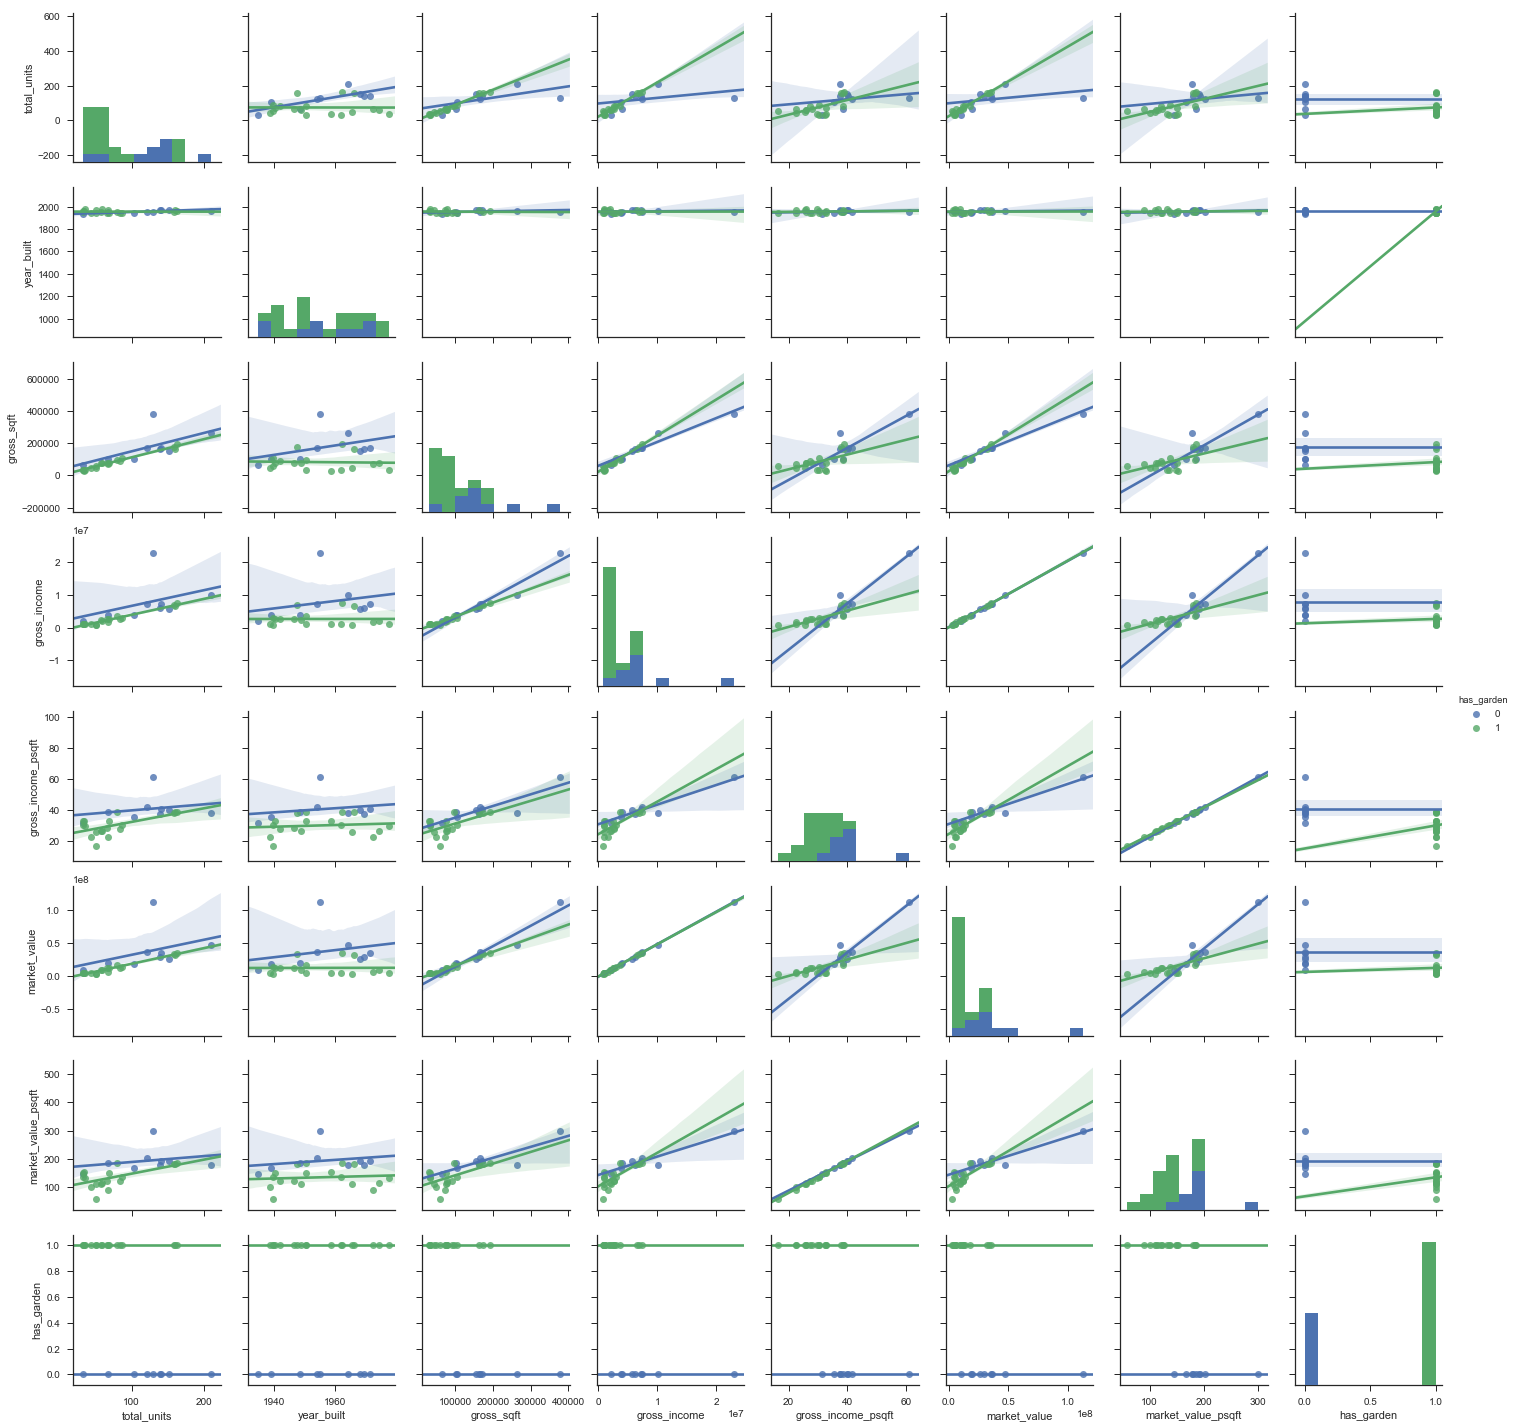

In [88]:
ana_cols = ['total_units', 'year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft']
# aa = nta[ana_cols]

sns.set(style="ticks")
sns.pairplot(data = nta[['total_units', 'year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft', 'has_garden']], kind="reg", hue = 'has_garden')
plt.show()

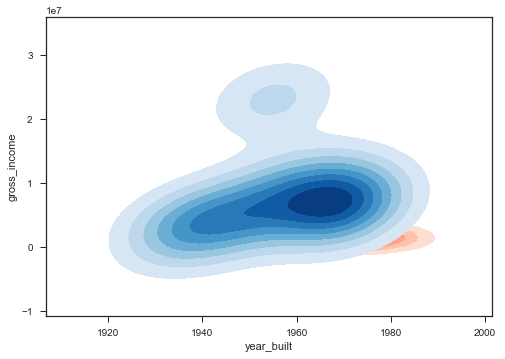

In [100]:

with_gardens = nta.loc[nta.has_garden == 1]
without_gardens = nta.loc[nta.has_garden == 0]

ax = sns.kdeplot(with_gardens.year_built, with_gardens.gross_income, cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(without_gardens.year_built, without_gardens.gross_income, cmap="Blues", shade=True, shade_lowest=False)
plt.show()

## Find the effect of greenthumb community garden

In [90]:
con_df['has_garden'] = 0
con_df['has_garden'] = con_df.apply(check_garden, axis=1)

In [96]:
np.bincount(con_df['has_garden'])

array([448, 631])

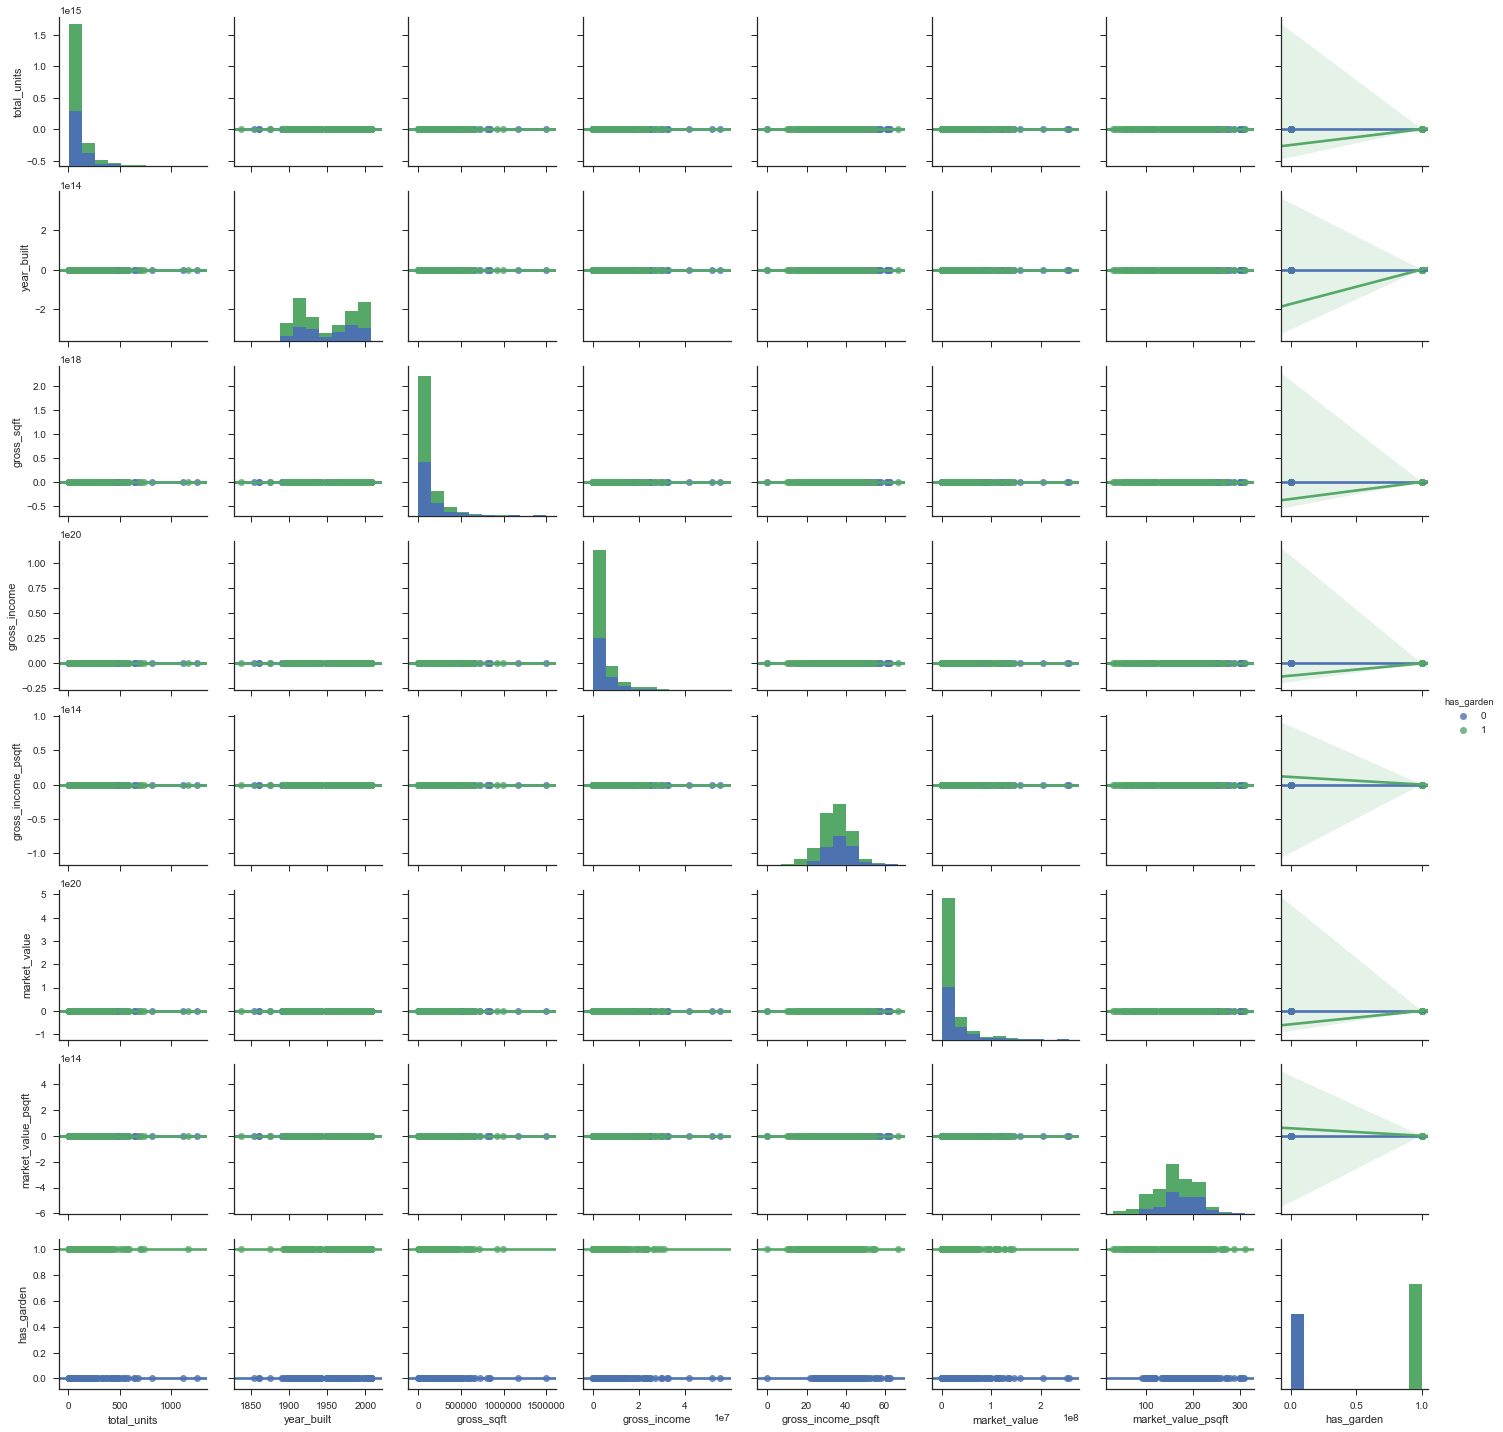

In [92]:
sns.set(style="ticks")
sns.pairplot(data = con_df[['total_units', 'year_built','gross_sqft', 'gross_income',
 'gross_income_psqft','market_value','market_value_psqft', 'has_garden']], kind="reg", hue = 'has_garden')
plt.show()